# Bikeshare Rental System in Washington DC¶
## by Pranav Bhatnagar

## Investigation Overview

In this investigation, I wanted to look at the different attributes such as season, holiday, weekday, workingday, weather  situation, temperature, humidity, windspeed that could be used to predict the total count of bike rentals. This will also go further into different relationships betweeen the various attributes including registered user count, casual count and total count of bike rentals in Washington DC.


## Dataset Overview

There are 730 records for each day.<br> 
<b>instant:</b> record index <br>
<b>dteday :</b> date <br>
<b>season :</b> season (1 :winter, 2:spring, 3:summer, 4:fall ) <br>
<b>yr :</b> year (0: 2011, 1:2012) <br>
<b>mnth :</b> month ( 1 to 12) <br>
<b>hr : </b>hour (0 to 23) <br>
<b>holiday :</b> weather day is holiday or not  <br>
<b>weekday :</b> day of the week <br>
<b>workingday :</b> if day is neither weekend nor holiday is 1, otherwise is 0. <br>
<b>weathersit :</b> <br>
<li>1: Clear, Few clouds, Partly cloudy, Partly cloudy
<li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
<b>temp :</b>Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)<br>
<b>atemp:</b> Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) <br>
    <b>hum:</b> Normalized humidity. The values are divided to 100 (max) <br>
    <b>windspeed:</b> Normalized wind speed. The values are divided to 67 (max) <br>
    <b>casual:</b> count of casual users <br>
    <b>registered:</b> count of registered users <br>
    <b>cnt:</b> count of total rental bikes including both casual and registered

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.drop(['instant','yr','mnth','atemp'], axis = 1, inplace = True)
df.rename(columns={'dteday':'date','hum':'humidity','cnt':'total_count','weathersit':'weather_situation'},inplace = True )
df.head()

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [4]:
df.date = pd.to_datetime(df.date)

#season(1:spring, 2:summer, 3:fall, 4:winter)
season_dict = {1:'winter',2:'spring',3:'summer',4:'fall'}
df.season = df.season.map(season_dict)

weekday_dict = {0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}
df.weekday = df.weekday.map(weekday_dict)

#1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
weather_situation_dict = {1:'clear',2:'mist',3:'light rain/snow',4:'heavy rain/snow'}
df.weather_situation = df.weather_situation.map(weather_situation_dict)

In [5]:
#changing datatypes from object to categorical
df.season = df.season.astype('category')
df.holiday = df.holiday.astype('category')
df.weekday = df.weekday.astype('category')
df.workingday = df.workingday.astype('category')
df.weather_situation = df.weather_situation.astype('category')
df.sample(10)

,date,season,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,casual,registered,total_count
21,2011-01-22,winter,0,saturday,0,clear,0.059130,0.400000,0.171970,93,888,981
475,2012-04-20,spring,0,friday,1,clear,0.526667,0.694583,0.149871,1340,5950,7290
302,2011-10-30,fall,0,sunday,0,clear,0.319167,0.623750,0.176617,885,2446,3331
317,2011-11-14,fall,0,monday,1,clear,0.530000,0.587083,0.306596,595,3891,4486
548,2012-07-02,summer,0,monday,1,clear,0.781667,0.447083,0.195267,904,5323,6227
523,2012-06-07,spring,0,thursday,1,clear,0.602500,0.567083,0.157350,1038,6456,7494
703,2012-12-04,fall,0,tuesday,1,clear,0.475833,0.733750,0.174129,551,6055,6606
293,2011-10-21,fall,0,friday,1,clear,0.427500,0.574167,0.221396,676,3628,4304
397,2012-02-02,winter,0,thursday,1,mist,0.399167,0.672917,0.187187,190,3571,3761
618,2012-09-10,summer,0,monday,1,clear,0.583333,0.503750,0.258713,1118,6407,7525


In [6]:
def graph_labels(xaxis,yaxis,title):
    '''
    this function is used to provide the graph with an appropriate title, x and y axis labels. 
    '''
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Registered & Casual Count of Rental Bikes

The number of casual bike rentals have a right skew distribution which mean The majority number of rentals(80%) lie within 1263 per day. On the other hand, the registered user count of bike rental is close to a normal distribution. Around 3K-4.5K bikes are rented at an average.

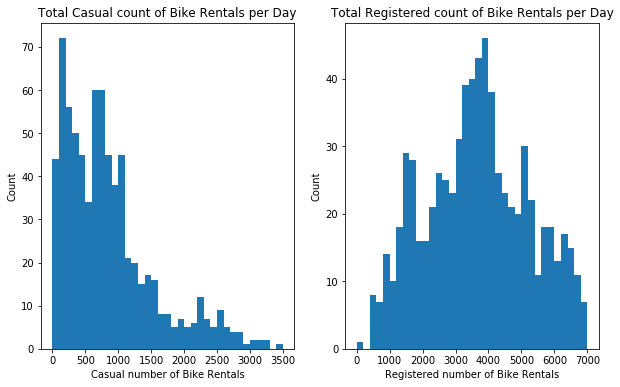

In [7]:
plt.figure(figsize=[10, 6])
#histogram for bike rentals for casual users
plt.subplot(1,2,1)
binsize = 100
bins = np.arange(0, df['casual'].max()+binsize, binsize)
plt.hist(data = df, x = 'casual', bins = bins)
graph_labels('Casual number of Bike Rentals','Count', 'Total Casual count of Bike Rentals per Day')

#histogram for bike rentals for registered users
plt.subplot(1,2,2)
binsize = 200
bins = np.arange(0, df['registered'].max()+binsize, binsize)
plt.hist(data = df, x = 'registered', bins = bins)
graph_labels('Registered number of Bike Rentals','Count', 'Total Registered count of Bike Rentals per Day')


## Boxplot for Total Count of Bike Rentals for different Season & Weather Conditions

The total count of bike rentals for the winter season, or days with rain, snow and thunderstorms is generally low. Also, Summer with clear skies had the most number of total rental count. It is closely followed by the Fall and Spring season. 

No handles with labels found to put in legend.


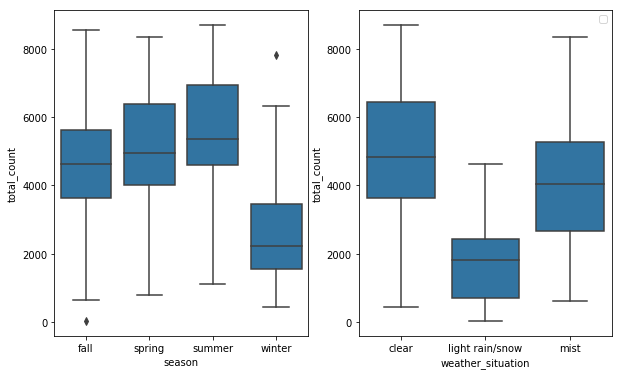

In [8]:
#box plot of total count with all categorical attributes
plt.figure(figsize = [10, 6])
color = sb.color_palette()[0]

# subplot 1: total_count v season
plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'season', y = 'total_count', color = color)

# subplot 2: total_count v weather_situation
ax = plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'weather_situation', y = 'total_count', color = color)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

## Weekdays & Count of Rental (Registered and Casual) for different Seasons
The registered bike rentals decrease on the weekends, while there is a significant rise in casual bike rentals over the weekend specially on Saturdays. The total count remains constant as weekdays there is heavy traffic of registered users, while casuals compensates on the the weekends. Summer is the most busy season followed closely by spring for casual bike rentals. Registered bike rentals prefer fall over summer as their second choice of season. 


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

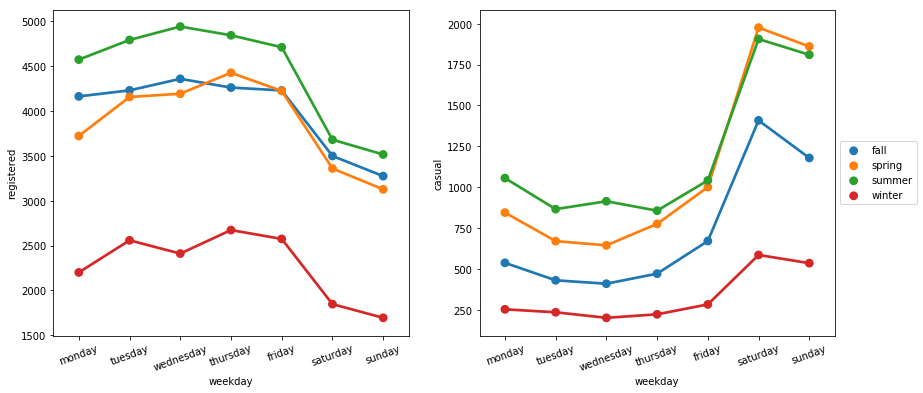

In [9]:
#subplots showing relationship between weekdays and count(registered and casual and total) in different seasons
plt.figure(figsize = [14, 6])
order = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

plt.subplot(1, 2, 1)
g = sb.pointplot(data = df,x ='weekday',y ='registered',hue = 'season', order = order, ci = None)
plt.xticks(rotation = 20)
g.legend().set_visible(False)

plt.subplot(1, 2, 2)
g = sb.pointplot(data = df,x ='weekday',y ='casual',hue = 'season', order = order, ci = None)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation = 20)

## Seasons & Count of Rental (Registered and Casual) for Holidays or Non-Holidays
It is observed that casual bike rentals go high during holidays specially during the summer. The casual bike rentals definitely takes a hit in the fall and winter due to the cold weather. On the other hand, the registered bike rentals prefer non-holidays to bike. There is not much drop in rentals counts for each season other than Winter.


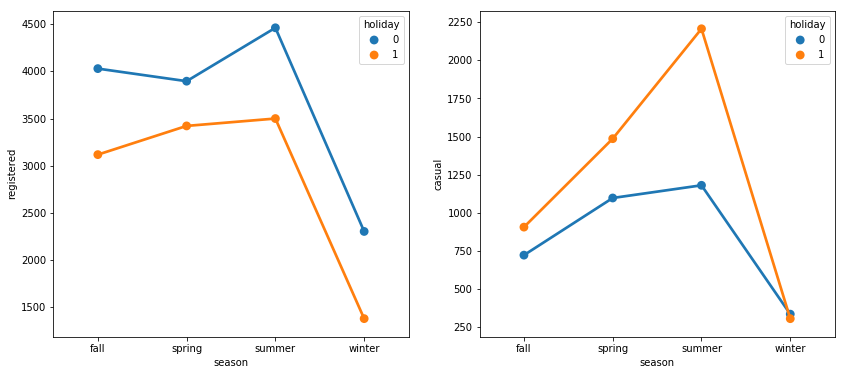

In [10]:
#subplots showing relationship between seasons and count(registered and casual) for whether its a holiday or not

plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)
sb.pointplot(data = df,x ='season',y ='registered',hue = 'holiday', ci = None)

plt.subplot(1, 2, 2)
sb.pointplot(data = df,x ='season',y ='casual',hue = 'holiday', ci = None)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!